Install woes
on my mac:
sudo easy_install GDAL
conda install krb5

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import skimage
from skimage import io
from skimage.external.tifffile import imread

In [5]:
import os
pth = '../../osgeopy-code/data/osgeopy-data/Utah/'
filename = os.path.join(pth, 'landcover60.tif')
landcover = imread(filename);

/Users/waddell/anaconda3/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2573: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  tile = decompress(tile)
/Users/waddell/anaconda3/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2579: UserWarning: invalid tile data
  warnings.warn("invalid tile data")


In [ ]:
plt.plot(landcover);

In [15]:
aerial = skimage.external.tifffile.imread('../../osgeopy-code/data/osgeopy-data/Utah/cache_no_gcp.tif')

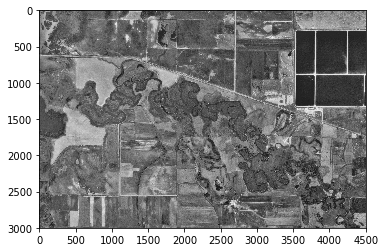

In [17]:
plt.imshow(aerial, cmap='gray');

In [24]:
# Script to compute NDVI.

import os
import numpy as np
from osgeo import gdal
import rastertools as rt

#os.chdir('../../osgeopy-code/data/osgeopy-data/Massachusetts/')
in_fn = '../../osgeopy-code/data/osgeopy-data/Massachusetts/m_4207162_ne_19_1_20140718_20140923_clip.tif'
out_fn = 'ndvi.tif'

ds = gdal.Open(in_fn)
red = ds.GetRasterBand(1).ReadAsArray().astype(np.float)
nir = ds.GetRasterBand(4).ReadAsArray()

# Mask the red band.
red = np.ma.masked_where(nir + red == 0, red)

# Do the calculation.
ndvi = (nir - red) / (nir + red)

# Fill the empty cells.
ndvi = ndvi.filled(-99)

# Set NoData to the fill value when creating the new raster.
out_ds = rt.make_raster(
    ds, out_fn, ndvi, gdal.GDT_Float32, -99)

overviews = rt.compute_overview_levels(out_ds.GetRasterBand(1))
out_ds.BuildOverviews('average', overviews)
del ds, out_ds


FileNotFoundError: [Errno 2] No such file or directory: '../../osgeopy-code/data/osgeopy-data/Massachusetts/'